# Instructions

1. Add your name below.
2. Complete each question. Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", and delete and `throw NotImplementedError()` lines.
3. Where applicable, run the test cases *below* each question to check your work.
4. Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). You can also use the **Validate** button to run all test cases.
5. Turn in your homework by going to the main screen in JupyterHub, clicking the Assignments menu, and submitting.



In [2]:
"""
Name: xiaochun Liang
"""

'\nName: xiaochun Liang\n'

## Data Loading

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('/etc/data/employees.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Adding Protected Attributes and Train/Test Splitting

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create X and y
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

# Encode y
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In this milestone, we will also be working to address imbalances performance in our classifier, where the model performs better on the majority class (Attrition=No) than the minority class (Attrition=Yes).

**Instructions**:
* Calculate the percent of the y-values where `Attrition` is 1 (True).
* Record this value in your Planning worksheet.

In [6]:
y_encoded.sum()

237

In [7]:
percent_attrition = (y_encoded.sum() / len(y_encoded)) * 100

In [8]:
percent_attrition

16.122448979591837

In this milestone, we will be working witht he [AIF360 library](https://aif360.readthedocs.io/en/stable/Getting%20Started.html).

In AIF360, we must explicitly identify our protected classes. To do so, we create a [Pandas index in our DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html), where the index of each row (instance) is the values of its protected attributes. By default, the index of a DataFrame will just be numbers, such as a `RangeIndex`.

In [9]:
X.head().index


RangeIndex(start=0, stop=5, step=1)

In [10]:
X.Gender.count()

1470

In [11]:
X.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

**Instructions**
* Assign `X.index` to have the value of `X.Gender`

Relevant documentation:
* [DataFrame.index](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html)

In [12]:
X.index = X.Gender

In [13]:
X.head().index

Index(['Female', 'Male', 'Male', 'Female', 'Male'], dtype='object', name='Gender')

In [14]:
assert (X.index == X.Gender).all(), "Make sure you have assigned X.index to X.Gender"

Similarly, we need to store the index in our y labels.

In [15]:
y_encoded = pd.Series(y_encoded, index=X.Gender)
y_encoded.head()

Gender
Female    1
Male      0
Male      1
Female    0
Male      0
dtype: int64

Now we split the data into a 70/30 train/test split. We will use cross-validation, so there is no need for a validation dataset.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=1234)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 34)
(441, 34)
(1029,)
(441,)


In [18]:
X_train.Gender.value_counts()

Male      619
Female    410
Name: Gender, dtype: int64

In [19]:
(619/( 410+619)) * 100

60.155490767735664

In [20]:
# # Step 1: Filter y_train for female workers
# female_attrition = y_train.loc['Female']

# # Step 2: Count the number of female workers with Attrition = 1
# female_attrition_true_count = (female_attrition == 1).sum()

# # Step 3: Calculate the total number of female workers
# total_female_count = len(female_attrition)

# # Step 4: Calculate the percentage
# percentage_female_attrition = (female_attrition_true_count / total_female_count) * 100

# # Step 5: Print the result
# print(f"The percentage of female workers with Attrition = True is {percentage_female_attrition:.2f}%")


## The Preprocessing Pipeline

We will use a similar preprocessing pipeline as in the prior milesone, with one major exception:
* Rather than using a pipeline to combine our encoders and our `MinMaxScaler`, we will create a custom Transformer that does these operations.
* The advantage of this is that we keep our dataset as a Pandas DataFrame, with the correct Index (Gender) value for each instance.

In [21]:
# First, we copy our code from the last Milestone

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, OneHotEncoder

nominal_columns = ['Department', 'EducationField', 'JobRole', 'MaritalStatus']
ordinal_or_binary_columns = ['BusinessTravel', 'OverTime', 'Gender']
irrelevant_columns = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']

ordinal_encoder = OrdinalEncoder(categories=[
    ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],
    ['No', 'Yes'],
    ['Male', 'Female'],
])

feature_encoder = make_column_transformer(
    (OneHotEncoder(), nominal_columns),
    (ordinal_encoder, ordinal_or_binary_columns),
    ('drop', irrelevant_columns),
    remainder='passthrough'
)

scaler = MinMaxScaler()

This `PreprocessingTransformer` acts very similar to a regular Pipeline:
* When fitting to training data, it will fit the encoder, then transform the data, then fit the scaler (to the encoded training data).
* When transforming the data, it will first encode it, then scale it.
* The only difference is that rather than return the raw output of the MinMaxScaler (a numpy ndarray), it returns a Pandas DataFrame, with the original index values the input data.

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class PreprocessingTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X_encoded = feature_encoder.fit_transform(X)
        scaler.fit(X_encoded)
        return self

    def transform(self, X, y=None):
        X_scaled = scaler.transform(feature_encoder.transform(X))
        # Return the 
        return pd.DataFrame(X_scaled, index=X.index)

preprocessing_pipeline = PreprocessingTransformer()
preprocessing_pipeline.fit_transform(X_train)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
Gender,,,,,,,,,,,,,,,,,,,,,
Female,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.666667,0.000000,0.575,0.500000,0.666667,0.125,0.176471,0.266667,0.235294
Female,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.000000,0.400,0.333333,0.666667,0.025,0.000000,0.000000,0.000000
Female,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.000000,1.000000,0.250,0.500000,0.333333,0.250,0.235294,0.066667,0.529412
Male,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.666667,0.333333,0.250,0.333333,0.333333,0.075,0.117647,0.000000,0.117647
Male,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.000000,0.000000,0.025,0.833333,0.666667,0.025,0.000000,0.066667,0.058824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Male,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.333333,0.250,0.666667,0.666667,0.075,0.117647,0.066667,0.117647
Male,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.666667,0.000000,0.275,0.333333,0.000000,0.225,0.411765,0.000000,0.411765
Male,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.333333,0.000000,0.275,0.500000,1.000000,0.275,0.470588,0.200000,0.588235


Notice that output is a DataFrame and it has an index called `Gender`.

## Models for Comparison

Normally we would want to use GridSearchCV again to ensure hyperparameter tuning with our decision tree, but because its just a baseline, we can take a shortcut and hard-code some decent hyperparameter values we found in the last milestone.

**Instructions**
* Create a pipeline called `decision_tree_pipeline` that includes our `preprocessing_pipeline`, as well as a `DecisionTreeClassifier`.
* Use the following parameters for the `DecisionTreeClassifier`:
  * The criterion should be `'entropy'`
  * The CCP Alpha should be `0.008`
  * The maximum depth should be `8`
  * The `random_state` should be `1234`
  
Relevant documentation
* [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

# TODO: Create the pipeline
decision_tree_pipeline = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier(criterion = 'entropy',max_depth=8,random_state=1234, ccp_alpha=0.008))


In [24]:
assert decision_tree_pipeline.steps[0][1] == preprocessing_pipeline, "Don't forget to start with the preprocessing_pipeline"
dt = decision_tree_pipeline.steps[1][1]
assert isinstance(dt, DecisionTreeClassifier), "Your second step should be a DecisionTreeClassifier"
assert dt.criterion == "entropy", "Set the criterion hyperparameter correctly"
assert dt.ccp_alpha == 0.008, "Set the alpha hyperparameter correctly"
assert dt.max_depth == 8, "Set the max depth hyperparameter correctly"
assert dt.random_state == 1234, "Set the random_state to 1234"

Now we will use the AdaBoost classifier we learned about in class.

**Instructions**
* Create an `adaboost_pipeline` with the same preprocessing steps and an `AdaBoostClassifier`.
* Set the AdaBoostClassifier's `random_state` to 1234.
* Do not set any of the hyperparameters; we will tune them later.

Relevant Documentation:
* [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

In [25]:
from sklearn.ensemble import AdaBoostClassifier
# TODO: Create adaboost_pipeline (don't forget imports!)
adaboost_pipeline = make_pipeline(preprocessing_pipeline,AdaBoostClassifier(random_state=1234))

In [26]:
assert adaboost_pipeline.steps[0][1] == preprocessing_pipeline, "Don't forget to start with the preprocessing_pipeline"
assert isinstance(adaboost_pipeline.steps[1][1], AdaBoostClassifier), "Your second step should be a AdaBoostClassifier"
assert adaboost_pipeline.steps[1][1].random_state == 1234, "Don't forget to set the random state of AdaBoost"

Now we will tune the hyperparameter of the AdaBoost classifier.

First, let's define the names of the `n_estimators` and `learning_rate` hyperparamters:

In [27]:
ada_step_name = adaboost_pipeline.steps[1][0]
ada_step_prefix = f"{ada_step_name}__"

n_estimators_key = ada_step_prefix + 'n_estimators'
learning_rate_key = ada_step_prefix + 'learning_rate'

We will copy the code for exploring a single hyperparameter value from the prior lab:

In [28]:
from sklearn.model_selection import GridSearchCV

def explore_single_hp_values(pipeline, param_name, param_values, X_train, y_train, k_fold, scoring):
    param_grid = {param_name: param_values}
    grid_search = GridSearchCV(pipeline, param_grid, cv=k_fold, scoring=scoring)
    grid_search.fit(X_train, y_train)
    result_columns = [f"param_{param_name}", "mean_test_score", "std_test_score", "rank_test_score"]
    return pd.DataFrame(grid_search.cv_results_)[result_columns]


We will use 3-fold cross-validation for hyperparameter tuning, since AdaBoost takes longer to train than other classifiers we have used because it is an ensemble of many classifiers.

In [29]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=3, shuffle=True, random_state=1234)

**Instructions**:
* Use the `explore_single_hp_values` function like you did in the prior milestone to identify a reasonable range of hyperparameters for the `n_estimators` and `learning_rate` hyperparameters.
* Use the scoring function your decided on in planning as the scoring function (e.g., `average_precision`, `f1`, etc.).

In [30]:
explore_single_hp_values(
    adaboost_pipeline,
    n_estimators_key,
    [10, 30, 70, 90],
    X_train, y_train, k_fold,
    'average_precision'
)

,param_adaboostclassifier__n_estimators,mean_test_score,std_test_score,rank_test_score
0,10,0.502826,0.083824,3
1,30,0.498376,0.054824,4
2,70,0.521529,0.064450,2
3,90,0.522829,0.046297,1


In [31]:
explore_single_hp_values(
    adaboost_pipeline,
    n_estimators_key,
    [50, 70, 90],
    X_train, y_train, k_fold,
    'average_precision'
)

,param_adaboostclassifier__n_estimators,mean_test_score,std_test_score,rank_test_score
0,50,0.504901,0.068462,3
1,70,0.521529,0.064450,2
2,90,0.522829,0.046297,1


In [32]:
explore_single_hp_values(
    adaboost_pipeline,
    n_estimators_key,
    [80,100,120],
    X_train, y_train, k_fold,
    'average_precision'
)

,param_adaboostclassifier__n_estimators,mean_test_score,std_test_score,rank_test_score
0,80,0.520456,0.052107,1
1,100,0.519915,0.047823,2
2,120,0.513739,0.038896,3


In [33]:
explore_single_hp_values(
    adaboost_pipeline,
    n_estimators_key,
    [80,90,100],
    X_train, y_train, k_fold,
    'average_precision'
)

,param_adaboostclassifier__n_estimators,mean_test_score,std_test_score,rank_test_score
0,80,0.520456,0.052107,2
1,90,0.522829,0.046297,1
2,100,0.519915,0.047823,3


In [34]:
explore_single_hp_values(
    adaboost_pipeline,
    n_estimators_key,
    [75,85],
    X_train, y_train, k_fold,
    'average_precision'
)

,param_adaboostclassifier__n_estimators,mean_test_score,std_test_score,rank_test_score
0,75,0.530316,0.062506,1
1,85,0.513845,0.049463,2


In [35]:
explore_single_hp_values(
    adaboost_pipeline,
    n_estimators_key,
    [65,66,67],
    X_train, y_train, k_fold,
    'average_precision'
)

,param_adaboostclassifier__n_estimators,mean_test_score,std_test_score,rank_test_score
0,65,0.522615,0.063503,2
1,66,0.517158,0.065415,3
2,67,0.522667,0.060055,1


In [36]:
explore_single_hp_values(
    adaboost_pipeline,
    learning_rate_key,
    [5,10,15],
    X_train, y_train, k_fold,
    'average_precision'
)

,param_adaboostclassifier__learning_rate,mean_test_score,std_test_score,rank_test_score
0,5,0.186558,0.064816,3
1,10,0.216124,0.030503,1
2,15,0.216124,0.030503,1


In [37]:
explore_single_hp_values(
    adaboost_pipeline,
    learning_rate_key,
    [20,25],
    X_train, y_train, k_fold,
    'average_precision'
)

,param_adaboostclassifier__learning_rate,mean_test_score,std_test_score,rank_test_score
0,20,0.217336,0.029695,1
1,25,0.215470,0.028099,2


**Instructions**:
* Define `adaboost_param_grid` with the hyperparameter ranges you selected above.
* It should be a dictionary, mapping hyperparameter keys to a list of values to explore.
* **Note**: You should probably use **3-4 values** for each hyperparamter to avoid overly long grid searches.

In [38]:
# TODO: Define your grid as a dictionary
adaboost_param_grid = {
  learning_rate_key: [10, 15,20],
    n_estimators_key:[70,75,80]
}



In [39]:
assert isinstance(adaboost_param_grid, dict), "adaboost_param_grid should be a {dict}"
assert learning_rate_key in adaboost_param_grid, "Your dictionary should have a key for learning_rate_key"
assert isinstance(adaboost_param_grid[learning_rate_key], list), "The value of learning_rate should be a list of value to explore"
assert n_estimators_key in adaboost_param_grid, "Your dictionary should have a key for n_estimators_key"
assert isinstance(adaboost_param_grid[n_estimators_key], list), "The value of n_estimators should be a list of value to explore"

**Instructions**:
* Create a `GridSearchCV` to search over your hyperparameter ranges for your `adaboost_pipeline`.
* Use the existing 3-fold `k_fold` and use the scoring function your decided on in planning as the scoring function (e.g., `average_precision`, `f1`, etc.).
* Fit the GridSearchCV to your training data.
* Report the best hyperparametrs and record these in your Reflection document.
* **Note**: This may take a moment

Relevant documentation:
* [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [40]:
from sklearn.model_selection import GridSearchCV
# TODO: Create the GridSearchCV
adaboost_tuned = GridSearchCV(adaboost_pipeline, adaboost_param_grid, scoring="f1", cv = k_fold)
adaboost_tuned.fit(X_train, y_train)


adaboost_tuned.best_params_

{'adaboostclassifier__learning_rate': 20,
 'adaboostclassifier__n_estimators': 70}

In [41]:
assert isinstance(adaboost_tuned, GridSearchCV), "Make sure to create a GridSearchCV"
assert learning_rate_key in adaboost_tuned.best_params_, "Make sure to fit your GridSearchCV"
assert n_estimators_key in adaboost_tuned.best_params_, "Make sure to fit your GridSearchCV"

**Instructions**:
* Visualize your grid search by running the next two cells.
* Adjust your grid as needed until you feel confident you have the best hyperparameters.

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_gridsearch_heatmap(results_df, x_param, y_param, score='mean_test_score'):
    # Pivot the table to format it for a heatmap
    heatmap_data = results_df.pivot(index=f'param_{y_param}', columns=f'param_{x_param}', values=score)

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='.3f', linewidths=0.5)
    plt.title(f'Grid Search Results: {score}')
    plt.xlabel(x_param)
    plt.ylabel(y_param)
    plt.show()

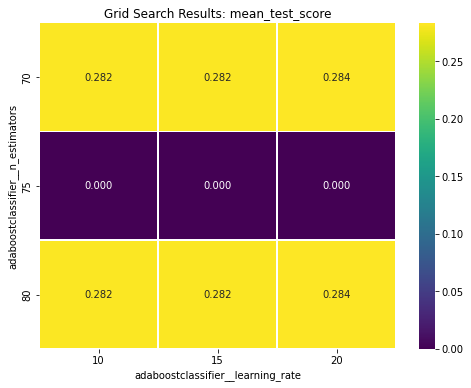

In [43]:
plot_gridsearch_heatmap(pd.DataFrame(adaboost_tuned.cv_results_), learning_rate_key, n_estimators_key)

Normally, we would use our `adaboost_tuned` (a `GridSearchCV`) as the primary pipeline to evaluate for GridSearch. This ensures that the hyperparameters are retuned to the training dataset each time the classifier is fit. This is the proper way to use GridSearch.

*However*, for the purposes of this milestone, we are going to fix our best hyperparameter values for the remainder of the notebook. We do this for two reasons:
* It will save a fair bit of processing time (especially important, since everyone is using the same JupyterHub server).
* It will ensure deterministic results, so you should get the same results as when this notebook was designed.

**Instructions**
* Create a new `adaboost_pipeline` with specific hyperparameters.
* Use the following hyperparameters:
  * `n_estimators` should be 60
  * `learning_rate` should be 0.75
  * `random_state` should be 1234

In [44]:
# YOUR CODE HERE
adaboost_pipeline = make_pipeline(preprocessing_pipeline ,AdaBoostClassifier(n_estimators=60, learning_rate=0.75,random_state=1234))

In [45]:
assert adaboost_pipeline.steps[0][1] == preprocessing_pipeline, "Don't forget to start with the preprocessing_pipeline"
dt = adaboost_pipeline.steps[1][1]
assert isinstance(dt, AdaBoostClassifier), "Your second step should be a AdaBoostClassifier"
assert dt.n_estimators == 60, "Set the n_estimators hyperparameter correctly"
assert dt.learning_rate == 0.75, "Set the learning_rate hyperparameter correctly"
assert dt.random_state == 1234, "Set the random_state to 1234"

## Initial Evaluation

Now, we will compare the two classifiers, DecisionTree and AdaBoost!

We will use the following metrics to evaluation our pipeline:

In [46]:
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision']

We are not yet ready for a final evaluation of our pipelines on the test dataset - there may be things we need to improve about our pipelines. Therefore, to evaluate our pipelines, it is important to use **cross-validation** within the training dataset. sklearn provides a handy `cross_validate` function that handles the hard parts of this for us.

**Instructions**:
* Use the `cross_validate` function to evaluate the `decision_tree_pipeline` on the training dataset.
* For `scoring` use the whole list of `scoring_metrics`. 
* Use `cv` (folds) of 5.

Relevant documentation
* [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)

In [47]:
from sklearn.model_selection import cross_validate

dt_cv_results = cross_validate(decision_tree_pipeline, X_train, y_train,cv =5 , scoring=scoring_metrics)

# Visualize them easily with a Pandas DataFrame
dt_performance = pd.DataFrame(dt_cv_results)
dt_performance

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc,test_average_precision
0,0.097282,0.013316,0.810680,0.384615,0.303030,0.338983,0.705991,0.332805
1,0.078496,0.013625,0.796117,0.285714,0.181818,0.222222,0.651603,0.252446
2,0.017441,0.070319,0.825243,0.428571,0.176471,0.250000,0.737517,0.356520
3,0.017631,0.067478,0.810680,0.413793,0.352941,0.380952,0.722042,0.318178
4,0.022943,0.012949,0.795122,0.263158,0.151515,0.192308,0.575229,0.227175


In [48]:
assert dt_performance.shape[0] == 5, "Make sure to use cv=5"
assert dt_performance.shape[1] == 8, "Make sure to use all metrics in scoring_metrics"
assert dt_performance.test_precision.mean() < 0.5, "Make sure you are evaluating the decision tree, not adaboost"

The advantage of cross-validation is that it gives us *k* different performance values, so we understand how they vary across different train/test folds. The *disadvantage* is that we cannot calculate a single confusion matrix from the results. By default, our metrics also only report values for the positive class (Attrition = 1).

To address this, we can use another function, `cross_val_predict`, which takes very similar parameters to `cross_validate`, but instead of returning the evaluation results for each round, it returns a single list of predictions for each instance in `X_train`, where that prediction was made when that instance was in the test dataset during cross-validation. Remember, in CV each instance (and each fold) is used once for testing and k-1 times for training. Therefore, even though these are predictions for the training dataset, each prediction comes from a model that was not trained on that instance! It therefore can be used to calculate validation performance (not training performance).

**Instructions**:
* Use `cross_val_predict` to create a set of cross-validated predictions for the `decision_tree_pipeline`.
  * Use X_train and y_train, and cv=5
  * Do no supply scoring metrics; this function only returns predictions.

Relevant documentation:
* [cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)

In [49]:
from sklearn.model_selection import cross_val_predict

# TODO Create results using cross_val_predict
dt_pred = cross_val_predict(decision_tree_pipeline, X_train, y_train,cv =5 )

In [50]:
assert len(dt_pred) == len(y_train), "Make sure you are using the training dataset for prediction"
assert (dt_pred == y_train).mean() > 0.6, "Make sure your predictions are an array of 0/1 values, representing predictions"

In [51]:
dt_pred

array([0, 0, 0, ..., 0, 0, 1])

Now we can use these predictions to create a classification report and confusion matrix for a more detailed inspection.

**Instructions**:
* Print a classification_report for the DecisionTree's predictions
* Print a confusion_matrix for the DecisionTree's predictions
  * **Note**: Read sklearn's documentation to make sure you understand how to interpret the rows and columns of the confusion matric correctly!
* Report and reflect on the results in your Reflection section.
  
Relevant documentation:
* [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)
* [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix



print("Classification Report:")
print(classification_report(y_train, dt_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_train, dt_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       862
           1       0.36      0.23      0.28       167

    accuracy                           0.81      1029
   macro avg       0.61      0.58      0.59      1029
weighted avg       0.78      0.81      0.79      1029

Confusion Matrix:
[[792  70]
 [128  39]]


One downside to sklearn's built-in CV functions is that they must be run separately, so if you want both results, you have to run CV twice. This can take a long time if your model takes a while to train. The following function computes both predictions and scoring metrics at the same time.

In [53]:
from sklearn.metrics import get_scorer
import numpy as np

def cross_validate_and_predict(model, X_train, y_train, metrics, cv_folds=5, random_state=1234):
    # Convert metrics to functions if they are strings
    metric_fns = [metric if callable(metric) else get_scorer(metric)._score_func for metric in metrics]
    kfold = KFold(n_splits=cv_folds, shuffle=True, random_state=random_state)
    y_preds = np.zeros(y_train.shape)
    results = []
    fold = 1
    for train_idx, test_idx in kfold.split(X_train):
        model.fit(X_train.iloc[train_idx], y_train[train_idx])
        y_pred = model.predict(X_train.iloc[test_idx])
        y_preds[test_idx] = y_pred
        fold_results = {'fold': fold}
        for metric_name, metric_fn in zip(metrics, metric_fns):
            value = metric_fn(y_train[test_idx], y_pred)
            fold_results[metric_name] = value
        results.append(fold_results)
        fold += 1
    return pd.DataFrame(results), y_preds

It takes the same arguments as cross_validate, but returns first a tuple, consisting of:
* A performance DataFrame, with results for each metric across CV folds
* A list of predictions

**Instructions**:
* Run the following cell. It should have the same or similar results to your prior results.

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

dt_performance, dt_pred = cross_validate_and_predict(
    decision_tree_pipeline, X_train, y_train, scoring_metrics
)

print(classification_report(y_train, dt_pred))
print(confusion_matrix(y_train, dt_pred))

dt_performance

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       862
           1       0.38      0.30      0.34       167

    accuracy                           0.81      1029
   macro avg       0.63      0.60      0.61      1029
weighted avg       0.79      0.81      0.80      1029

[[781  81]
 [117  50]]


,fold,accuracy,precision,recall,f1,roc_auc,average_precision
0,1,0.791262,0.250000,0.151515,0.188679,0.532405,0.173801
1,2,0.815534,0.363636,0.250000,0.296296,0.584770,0.207414
2,3,0.800971,0.405405,0.441176,0.422535,0.656635,0.271088
3,4,0.820388,0.333333,0.233333,0.274510,0.576894,0.189428
4,5,0.809756,0.483871,0.394737,0.434783,0.649464,0.303197


Now do the same thing for your `adaboost_pipeline`.

**Instructions**:
* Create `adaboost_performance` and `adaboost_pred` using the `cross_validate_and_predict` function.
* Use the training dataset and scoring metrics, as above.
* Print the `classification_report` and `confusion_matrix` and reflect on the results in your Reflection section.

In [55]:
adaboost_performance , adaboost_pred = cross_validate_and_predict(
    adaboost_pipeline, X_train, y_train, scoring_metrics
)

print(classification_report(y_train, adaboost_pred))
print(confusion_matrix(y_train, adaboost_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       862
           1       0.67      0.33      0.44       167

    accuracy                           0.86      1029
   macro avg       0.78      0.65      0.68      1029
weighted avg       0.85      0.86      0.85      1029

[[835  27]
 [112  55]]


In [56]:
assert adaboost_performance.shape == (5, 7), "Make sure you assign the first result from the tuple to adaboost_performance"
assert len(adaboost_pred) == len(y_train), "Make sure you assign the second result from the tuple to adaboost_pred"

The following function plots comparative boxplots for the performance of each classifier across folds, across each evaluation metric. The boxplots each show a range of performances across folds, and comparing adjacent boxplots allows us to see if one classifier consistnently performs better than another.

**Instructions**:
* Run the following cell.
* Analyze the results in your Reflection section.

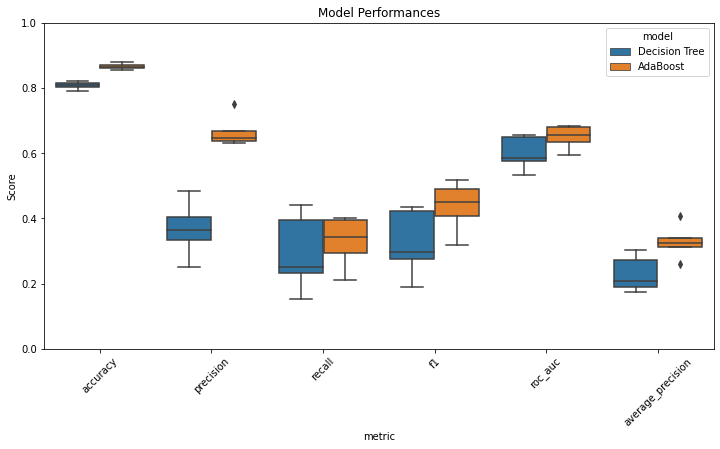

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_performances(named_performances):
    # Concatenate all the results DataFrames into a single dataframe
    all_performances = None
    for model_name, performance in named_performances:
        performance = performance.copy()
        # Add a column for the "model" so we know which results belong to which
        performance['model'] = model_name
        if all_performances is None:
            all_performances = performance
        else:
            all_performances = pd.concat([all_performances, performance])
    # Remove the "fold" attribute, so we don't graph it
    all_performances.drop('fold', axis=1, inplace=True)
    # Melt the data, so its in a "long" format instead of a "wide" format,
    # which seaborn prefers.
    performances_melted = all_performances.melt(id_vars=['model'], var_name='metric', value_name='score')
    
    # Use Seaborn/matplot to plot the comparative boxplots
    plt.figure(figsize=(12, 6))
    # The x-axis is the metric, the y-axis is the score, and the hue is the model
    sns.boxplot(data=performances_melted, x='metric', y='score', hue='model')
    # Always use 0-1 for the y-axis.
    plt.ylim(0, 1)
    plt.title('Model Performances')
    plt.ylabel('Score')
    plt.xticks(rotation=45)
    plt.show()

# Call the function, passing our 2 models
plot_performances([
    ('Decision Tree', dt_performance),
    ('AdaBoost', adaboost_performance)
])

## Oversampling

One of the clear challenges for both of our classifiers is poor performance on the positive, minority class (Attrition = True) compared with the negative, majority class (Attrition = False).

To address that, we will use a technique called oversampling. For this we will use the [imbalanced-learn library](https://imbalanced-learn.org/stable/).

**Instructions**:
* Create a RandomOverSampler. This is a pre-processing step which will oversample before training (but not before prediction/testing).
* Set the sampling_strategy to 'minority'. This tells the oversampler to oversample the minority class until it has the same representation as the majority class.

Relevant documentation:
* [RandomOverSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)

In [58]:
from imblearn.over_sampling import RandomOverSampler

# TODO: Create the oversampler
oversampler = RandomOverSampler( sampling_strategy='minority')


In [59]:
# Let's see the results (which include a resampled X and Y)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("Shape of X_train_resampled", X_train_resampled.shape)
print("Number of duplicated instances in X_train_resampled", X_train_resampled.duplicated().sum())
print("Percent of y_train_resampled that is positive class:", y_train_resampled.mean())

Shape of X_train_resampled (1724, 34)
Number of duplicated instances in X_train_resampled 695
Percent of y_train_resampled that is positive class: 0.5


In [60]:
assert y_train_resampled.mean() == 0.5, "Make sure you have set the sampling_strategy to 'minority'"

You may have noticed that, unlike a normal sklearn preprocessing step (e.g. `MinMaxScaler`), the `oversampler` uses `fit_resample` rather than `fit_transform`, and this method returns both a resampled `X` and `y`.

Because of this difference, if we want to use oversampling in a pipeline, we need to use a special pipeline that accounts for this, proveded by imbalanced-learn. It is also called `Pipeline`, but to avoid confusion we will import it as `ImbPipeline`.

**Instructions**
* Create an `ImbPipeline` consisting of first the oversampler, then the adaboost_pipeline.
* The ImbPipeline takes as its first argument a list of ("Step Name", step) tuples. For example:

```
pipeline = ImbPipeline([("Step name 1", step_1), ("Step name 2", step_2)])
```

Relevant documentation:
* [Pipeline](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html)

In [61]:
from imblearn.pipeline import Pipeline as ImbPipeline

# TODO: Create an oversampling adaboost pipeline
oversampled_adaboost_pipeline = ImbPipeline([("oversampler", oversampler), ("adaboost_pipeline", adaboost_pipeline)])


oversampled_adaboost_pipeline

Pipeline(steps=[('oversampler',
                 RandomOverSampler(sampling_strategy='minority')),
                ('adaboost_pipeline',
                 Pipeline(steps=[('preprocessingtransformer',
                                  PreprocessingTransformer()),
                                 ('adaboostclassifier',
                                  AdaBoostClassifier(learning_rate=0.75,
                                                     n_estimators=60,
                                                     random_state=1234))]))])

In [62]:
assert oversampled_adaboost_pipeline.steps[0][1] == oversampler, "Make sure you oversample before Adaboost"
assert oversampled_adaboost_pipeline.steps[1][1] == adaboost_pipeline, "Make sure you use your adaboost_pipeline second"

Now we can compare the performance of our oversampled pipeline to our original AdaBoost.

**Instructions**:
* Use our `cross_validate_and_predict` (defined above) to get the performance and predictions for the `oversampled_adaboost_pipeline`.
* Print the `classification_report` and `confusion_matrix` using the predictions.
* Analyze these results in your Reflection section.

In [63]:
# TODO: Calculate the performance and predictions
oversampled_adaboost_performance,oversampled_adaboost_pred = cross_validate_and_predict(
    oversampled_adaboost_pipeline, X_train, y_train, scoring_metrics
)

# TODO: Print the classification_report and confusion_matrix

print("Classification Report:")
print(classification_report(y_train, oversampled_adaboost_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_train, oversampled_adaboost_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       862
           1       0.39      0.63      0.48       167

    accuracy                           0.78      1029
   macro avg       0.65      0.72      0.67      1029
weighted avg       0.83      0.78      0.80      1029

Confusion Matrix:
[[693 169]
 [ 61 106]]


Now we can plot the CV performance of each model side-by-side.

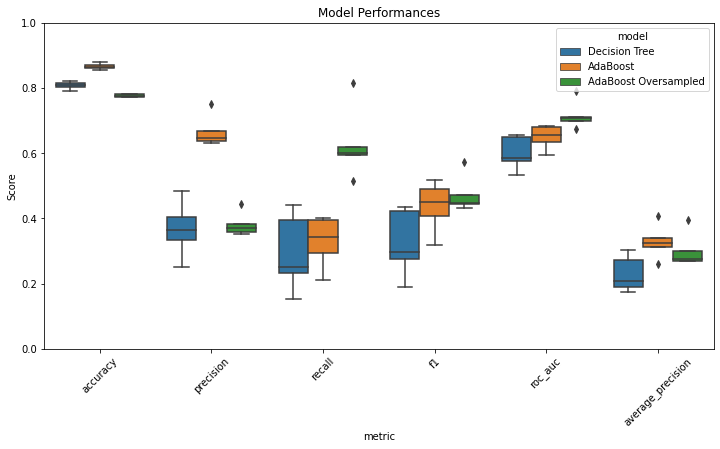

In [64]:
plot_performances([
    ('Decision Tree', dt_performance),
    ('AdaBoost', adaboost_performance),
    ('AdaBoost Oversampled', oversampled_adaboost_performance)
])

## Synthetic Data

Another approach for addressing poor performance on a minorty class is data augmentation with *synthetic* data. This has the same goal as oversampling -- increasing the number of minority class instances -- but it does so by creating new data, rather than repeating the sampling of existing data.

We will use a technique called SMOTE, specifically a version called SMOTENC, which handles both nominal and continuous attributes. In order to work, it needs to know which attributes in our dataset are nominal (really, it means categorical - any data object not represented by a number). Therefore, we start by identifying all of the string columns in our dataset.

**Note**: we could also apply SMOTE after feature encoding, though this may not make sense, since SMOTE will, by default, create values other than 0/1 for binary or one-hot encoded attributes.

In [65]:
# indices of string columns in DF
string_cols = X_train.select_dtypes(include=['object']).columns
string_cols_indices = [X_train.columns.get_loc(col) for col in string_cols]
string_cols_indices

[1, 3, 6, 10, 14, 16, 20, 21]

**Instructions**:
* Create a SMOTENC preprocessing step.
  * Provide it the set of `string_cols_indices` for its categorical features.
  * Use a `random_state` of `1234`.
* Create a `smote_adaboost_pipeline`, consisting of a `smote` step followed by the `adaboost_pipeline`.

Relevant documentation:
* [SMOTENC](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html): Pay attention to the `categorical_features` parameter.

In [66]:
from imblearn.over_sampling import SMOTENC

# TODO: Create a SMOTENC preprocessing step
smote = SMOTENC(string_cols_indices, random_state=1234)

# TODO: Create an ImbPipeline with smote + adaboost
smote_adaboost_pipeline = ImbPipeline([("smote", smote), ("adaboost_pipeline", adaboost_pipeline)])



In [67]:
assert isinstance(smote, SMOTENC), "Make sure to use SMOTENC, not SMOTE"
assert smote.categorical_features == string_cols_indices, "Make sure to set the categorical features"
assert smote.random_state == 1234, "Make sure to set the random state"

assert smote_adaboost_pipeline.steps[0][1] == smote, "Make sure you oversample before Adaboost"
assert smote_adaboost_pipeline.steps[1][1] == adaboost_pipeline, "Make sure you use your adaboost_pipeline second"

Note that when SMOTE resamples the dataset, we still get balanced data, but this time without duplicates!

In [68]:
# Let's see the results (which include a resampled X and Y)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Shape of X_train_resampled", X_train_resampled.shape)
print("Number of duplicated instances in X_train_resampled", X_train_resampled.duplicated().sum())
print("Percent of y_train_resampled that is positive class:", y_train_resampled.mean())

Shape of X_train_resampled (1724, 34)
Number of duplicated instances in X_train_resampled 0
Percent of y_train_resampled that is positive class: 0.5


Now we can compare the performance of our SMOTE pipeline to the other versions.

**Instructions**:
* Use our `cross_validate_and_predict` (defined above) to get the performance and predictions for the `smote_adaboost_pipeline`.
* Print the `classification_report` and `confusion_matrix` using the predictions.
* Analyze these results in your Reflection section.
* **Note**: This may take a moment to run.

In [69]:
# TODO: Calculate the performance and predictions
smote_adaboost_performance,smote_adaboost_pred = cross_validate_and_predict(
    smote_adaboost_pipeline, X_train, y_train, scoring_metrics
)

print(classification_report(y_train, smote_adaboost_pred))
print(confusion_matrix(y_train, smote_adaboost_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       862
           1       0.46      0.57      0.51       167

    accuracy                           0.82      1029
   macro avg       0.69      0.72      0.70      1029
weighted avg       0.84      0.82      0.83      1029

[[752 110]
 [ 72  95]]


In [70]:

print(classification_report(y_train, adaboost_pred))
print(confusion_matrix(y_train, adaboost_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       862
           1       0.67      0.33      0.44       167

    accuracy                           0.86      1029
   macro avg       0.78      0.65      0.68      1029
weighted avg       0.85      0.86      0.85      1029

[[835  27]
 [112  55]]


Now we can plot the perforamnce of our 4 classifiers side-by-side:

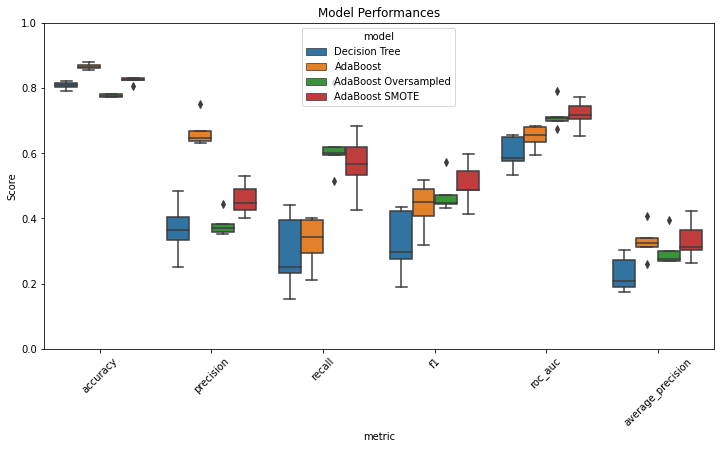

In [71]:
plot_performances([
    ('Decision Tree', dt_performance),
    ('AdaBoost', adaboost_performance),
    ('AdaBoost Oversampled', oversampled_adaboost_performance),
    ('AdaBoost SMOTE', smote_adaboost_performance)
])

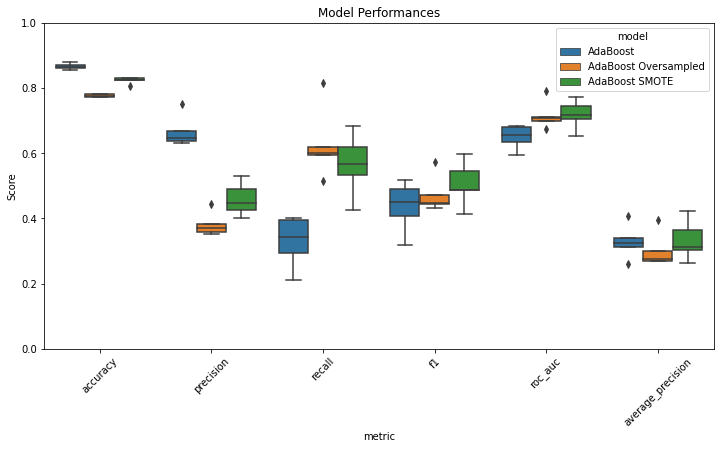

In [72]:
plot_performances([
#     ('Decision Tree', dt_performance),
    ('AdaBoost', adaboost_performance),
    ('AdaBoost Oversampled', oversampled_adaboost_performance),
    ('AdaBoost SMOTE', smote_adaboost_performance)
])

## Learning Curves

Our classifier is now performing much better on the minority class, but the overall performance has not necessarily improved much. This makes sense; often there is a trade-off for minority-class performance vs overall preformance.

We can investigate whether we have sufficient data using a learning curve, which plots the performance of the classifier as we increase training data.

**Instructions**:
* Read the documentation for the [learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html) function.
* Use this function to calculate the training_sizes, train_scores and test_scores for the `oversampled_adaboost_pipeline`.
  * Use your training data for this analysis (`X_train`, `y_train`).
  * For the train_sizes, use `[0.1, 0.2, ..., 0.9, 1.0]`. As a shorthand, you can use `np.linspace(0.1, 1.0, 10)`.
  * For scoring, use `"average_precision"`.
  * **Note**: This function returns a tuple with 3 items in it. You can save each reulst in a separate variable like this: `result_1, result_2, result_3 = learning_curve(...)`
  * **Note**: The function may throw some warnings, but this is ok. Average precision may not be well defined if the classifier performs very poorly with limited training data.
* Plot the results (using the code in the following cell).
* Analyze the plot below in your Reflection section.

Relevant documentation:
* [learning_curve](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html)

In [73]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import average_precision_score
import numpy as np

# TODO: Define these variables using learning_curve
train_sizes ,train_scores ,test_scores =  learning_curve(
    oversampled_adaboost_pipeline , X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10),scoring="average_precision"
)



print(train_sizes)
print(test_scores)

[ 82 164 246 329 411 493 576 658 740 823]
[[0.34836881 0.17813873 0.35426794 0.38503581 0.20124727]
 [0.35877451 0.19946736 0.40015697 0.41274415 0.26238242]
 [0.39088896 0.32075985 0.58706699 0.51718629 0.50313398]
 [0.38603643 0.36799575 0.55329318 0.46597088 0.47419766]
 [0.51548601 0.38905745 0.57244924 0.37682057 0.51521695]
 [0.4468455  0.3724806  0.65976458 0.42478881 0.48682092]
 [0.48652885 0.37324715 0.7125937  0.38913276 0.46554637]
 [0.45841185 0.38684643 0.6323774  0.49848178 0.45944169]
 [0.46266627 0.42233199 0.71381883 0.64082491 0.48495226]
 [0.46511175 0.4646357  0.61201632 0.62193893 0.50527135]]


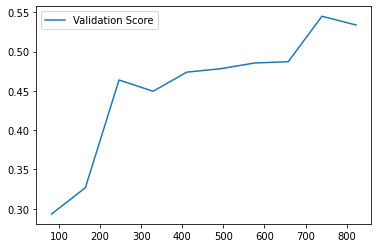

In [74]:
# Now we plot the results
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.legend()
plt.show()

## Fairness Evaluation

Now that we have improved our classifier's performance in a number of ways, we should evaluate how *fair* those results are. We will do so using the [AI Fairness 360](https://aif360.readthedocs.io/en/stable/Getting%20Started.html) library.

For this evaluation, we will focus on the results of our regular (**not oversampled**) AdaBoost pipeline.

In [75]:
from aif360.sklearn.metrics import statistical_parity_difference, disparate_impact_ratio, equal_opportunity_difference

We will investigate fairness with respect to **Gender**. For the sake of this analysis, we will consider "Male" to be the privileged group.

To perform this analysis, we will need to have a binary vector indicating which instances in our training dataset are male. 

In [76]:
is_male_train = X_train['Gender']=='Male'
is_male_train.mean()

0.6015549076773566

**Instructions**
* Calculate the `statistical_parity_difference` for the CV predictions of our AdaBoost pipeline, `adaboost_pred`.
* Like many metrics, we need to provide the true y-labels and the predicted y-labels.
* **Note**: Unlike other metrics, we also need to provide the `prot_attr`, which should be a our `is_male_train` binary vector, indicating which instances are Male.
* Report your result and analyze it in the Reflection section.

Relevant documentation:
* [statistical_parity_difference](https://aif360.readthedocs.io/en/latest/modules/generated/aif360.sklearn.metrics.statistical_parity_difference.html)

In [77]:
from aif360.sklearn.metrics import statistical_parity_difference
# **here**
spd = statistical_parity_difference(y_train, y_pred=adaboost_pred, prot_attr=is_male_train)
spd

-0.006781197052681348

SPD is the difference between the likelihood of predicting attrition for the unprivileged class (Female) minus the likelihood of predicting attrition for the privileged class (Male).

In [78]:
adaboost_pred[~is_male_train].mean() - adaboost_pred[is_male_train].mean()

-0.006781197052681348

In [79]:
assert spd == (adaboost_pred[X_train['Gender'] == 'Female'].mean() - adaboost_pred[is_male_train].mean())

For comparison, it is important to consider the relative frequencies of attrition among men and women.

**Instructions**:
* Calculate the likelihood of a Male and Female working having Attrition = True.
* Report and analyze this in your Reflection section.

In [80]:
# YOUR CODE HERE
adaboost_pred[~is_male_train].mean()

0.07560975609756097

In [81]:
 adaboost_pred[is_male_train].mean()

0.08239095315024232

The disparate impact ration (DIR) is the ratio between the likelihood of predicting attrition for the unprivileged class (Female) minus and likelihood of predicting attrition for the privileged class (Male).

The DIR is very similar to SPD, but it reports this as a ratio, rather than a difference.

**Instructions**
* Calculate the `disparate_impact_ratio` for the CV predictions of our AdaBoost pipeline, `adaboost_pred`. It has the same parameters as SPD.
* Report your result and analyze it in the Reflection section.

Relevant documentation:
* [disparate_impact_ratio](https://aif360.readthedocs.io/en/latest/modules/generated/aif360.sklearn.metrics.disparate_impact_ratio.html)

In [82]:
from aif360.sklearn.metrics import disparate_impact_ratio

# TODO: Compute the DIR
di_ratio = disparate_impact_ratio(y_train, y_pred=adaboost_pred, prot_attr=is_male_train)
# YOUR CODE HERE


di_ratio

0.9176948828311813

In [83]:
assert di_ratio == (adaboost_pred[~is_male_train].mean() / adaboost_pred[is_male_train].mean())

The equal opportunity different (EOD) is the difference between the **recall** for the unprivileged class (Female) minus and the recall for the privileged class (Male).

The EOD calculates recall with respect to the positive class, in this case, how well the classifier identifies people who will actually have Attrition.

**Instructions**
* Calculate the `equal_opportunity_difference` for the CV predictions of our AdaBoost pipeline, `adaboost_pred`. It has the same parameters as SPD and DIR.
* Report your result and analyze it in the Reflection section.

Relevant documentation:
* [equal_opportunity_difference](https://aif360.readthedocs.io/en/stable/modules/generated/aif360.sklearn.metrics.equal_opportunity_difference.html)

In [84]:
from aif360.sklearn.metrics import equal_opportunity_difference

# TODO calculate the equal opportunity difference
eod = equal_opportunity_difference(y_train, y_pred=adaboost_pred, prot_attr=is_male_train)


eod

0.10836385836385837

In [85]:
from sklearn.metrics import recall_score

recall_f = recall_score(y_train[~is_male_train], adaboost_pred[~is_male_train])
recall_m = recall_score(y_train[is_male_train], adaboost_pred[is_male_train])
assert eod == recall_f - recall_m

One final metric we will look at is [**Average Odds Difference**](https://aif360.readthedocs.io/en/stable/modules/generated/aif360.sklearn.metrics.average_odds_difference.html#aif360-sklearn-metrics-average-odds-difference). This is probably the most informative metric. It measures the average difference between the true postiive rates and false positive rates of the two groups in the protected attribute.

In [86]:
from aif360.sklearn.metrics import average_odds_difference

average_odds_difference(y_train, adaboost_pred, prot_attr=is_male_train)


0.04243911280857646

Probably the most informative way to look at the difference between classifier results for men and women is to simply calculate the classification_report and confusion_matrix for each group:

In [87]:
print('Male')
print(classification_report(y_train[is_male_train], adaboost_pred[is_male_train]))

print('Female')
print(classification_report(y_train[~is_male_train], adaboost_pred[~is_male_train]))


Male
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       515
           1       0.59      0.29      0.39       104

    accuracy                           0.85       619
   macro avg       0.73      0.62      0.65       619
weighted avg       0.82      0.85      0.82       619

Female
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       347
           1       0.81      0.40      0.53        63

    accuracy                           0.89       410
   macro avg       0.85      0.69      0.74       410
weighted avg       0.89      0.89      0.88       410



In [88]:
print('Male')
# Note: we use normalize=True to show fractions in each row
print(confusion_matrix(y_train[is_male_train], adaboost_pred[is_male_train], normalize="true"))

print('Female')
print(confusion_matrix(y_train[~is_male_train], adaboost_pred[~is_male_train], normalize="true"))


Male
[[0.9592233  0.0407767 ]
 [0.71153846 0.28846154]]
Female
[[0.98270893 0.01729107]
 [0.6031746  0.3968254 ]]


## Addressing Bias

Now we will explore ways to address our model's bias. The simplest apporach is simply to *remove* the Gender attribute. It's very possible that the only reason we see different outcomes for men and women in our dataset is that the classifier is using that attribute actively to make the decision.

To do this, we can add a preprocessing step to remove the attribute, but that would involve reworking our whole preprocessing pipeline. A simpler approach is to simply remove the variance in the `Gender` attribute by setting all instances to one gender, e.g. "Female" - that way the model can't make decisions based on Gender. That's what the function `remove_gender_variance` does.

In [89]:
# Create a preprocessing step that simply sets all Gender values to "Female"
def remove_gender_variance(X):
    X = X.copy()
    X['Gender'] = 'Female'
    return X

# A function transformer applies a specific function as a preprocessing step in a Pipeline
from sklearn.preprocessing import FunctionTransformer
remove_gender_transformer = FunctionTransformer(remove_gender_variance)

# If we apply this transformer, we see now all instances are artificially set to Female
remove_gender_transformer.fit_transform(X_train)['Gender'].value_counts()

Female    1029
Name: Gender, dtype: int64

**Instructions**:
* Create a `adaboost_no_gender_pipeline` that first applies the `remove_gender_transformer`, then the `adaboost_pipeline`.

In [90]:
# TODO: Create the adaboost_no_gender_pipeline
adaboost_no_gender_pipeline =  make_pipeline(remove_gender_transformer, adaboost_pipeline)


In [91]:
assert adaboost_no_gender_pipeline.steps[0][1] == remove_gender_transformer, "The gender remover comes first"
assert adaboost_no_gender_pipeline.steps[1][1] == adaboost_pipeline, "adaboost_pipeline comes second"

**Instructions**:
* Now use the `cross_validate_and_predict` function to calculate the performance and predictions for the new `adaboost_no_gender_pipeline`.
* Print the `classification_report` and the `confusion_matrix` for the predictions.
* Record and analyze these results in your Reflection section.

In [92]:
no_gender_performance , no_gender_pred =  cross_validate_and_predict(
    adaboost_no_gender_pipeline, X_train, y_train, scoring_metrics
)

print(classification_report(y_train, no_gender_pred))
print(confusion_matrix(y_train, no_gender_pred))

dt_performance

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       862
           1       0.69      0.34      0.46       167

    accuracy                           0.87      1029
   macro avg       0.79      0.66      0.69      1029
weighted avg       0.85      0.87      0.85      1029

[[836  26]
 [110  57]]


,fold,accuracy,precision,recall,f1,roc_auc,average_precision
0,1,0.791262,0.250000,0.151515,0.188679,0.532405,0.173801
1,2,0.815534,0.363636,0.250000,0.296296,0.584770,0.207414
2,3,0.800971,0.405405,0.441176,0.422535,0.656635,0.271088
3,4,0.820388,0.333333,0.233333,0.274510,0.576894,0.189428
4,5,0.809756,0.483871,0.394737,0.434783,0.649464,0.303197


In [93]:
assert no_gender_performance.shape == (5, 7), "The first returned value is the performance"
assert no_gender_pred.shape == y_train.shape, "The second returned value is the predictions"

Now we can plot the comparative performance of our original `adaboost_pipeline` compared with the new pipeline trained on data without the Gender attribute. Did it hurt performance to remove that attribute?

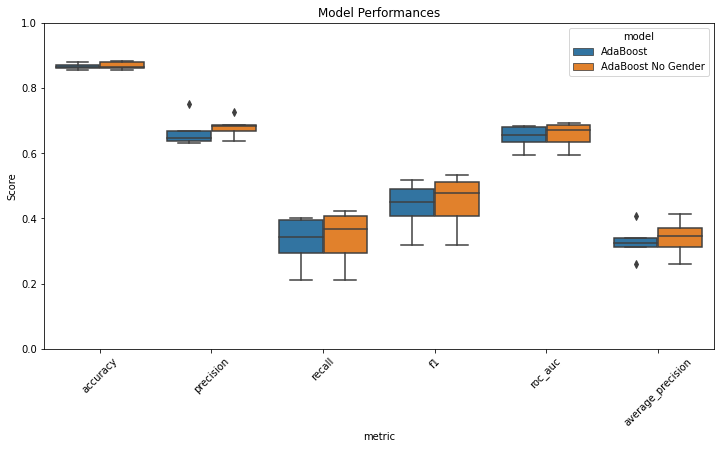

In [94]:
plot_performances([
    ('AdaBoost', adaboost_performance),
    ('AdaBoost No Gender', no_gender_performance)
])

Now let's evaluate whether removing gender also removed bias in the outcomes of the classifier.

**Instructions**:
* Evaluate the `equal_opportunity_difference` of the `no_gender_pred` predictions without the Gender attribute.
* You can check your earlier code if you've forgotten how to calculate EOD.

In [95]:
eod_no_gender = equal_opportunity_difference(y_train, y_pred=no_gender_pred, prot_attr=is_male_train)

eod_no_gender

0.19108669108669107

In [96]:
assert eod_no_gender == equal_opportunity_difference(y_train, no_gender_pred, prot_attr=is_male_train)

It is much easier to evaluate the impact of this preprocessing step visually. The following function takes as input a list of `("Name", predictions)` tuples (one for each classifier), the `y_train` true labels, and a binary vector of whether or not each instance is in the privileged class

In [97]:
from aif360.sklearn.metrics import average_odds_difference

def visualize_bias(named_predictions, y_train, prot_attr_true):
    results = []
    for model_name, predictions in named_predictions:
        spd = statistical_parity_difference(y_train, predictions, prot_attr=prot_attr_true)
        results.append({'model': model_name, 'bias': spd, 'metric': 'SPD'})
        dir = disparate_impact_ratio(y_train, predictions, prot_attr=prot_attr_true)
        results.append({'model': model_name, 'bias': dir, 'metric': 'DIR'})
        eod = equal_opportunity_difference(y_train, predictions, prot_attr=prot_attr_true)
        results.append({'model': model_name, 'bias': eod, 'metric': 'EOD'})
        aod = average_odds_difference(y_train, predictions, prot_attr=prot_attr_true)
        results.append({'model': model_name, 'bias': aod, 'metric': 'AOD'})
    results_df = pd.DataFrame(results)
    plt.figure(figsize=(8, 6))
    sns.barplot(data=results_df, x='metric', y='bias', hue='model')
    plt.title('Bias Metrics')
    plt.ylabel('Value')
    plt.show()

**Instructions**:
* Run the following cell to compare the `adaboost_pipeline` to a version trained on data where the Gender attribute was removed.
* Analyze the results in your Reflection section.

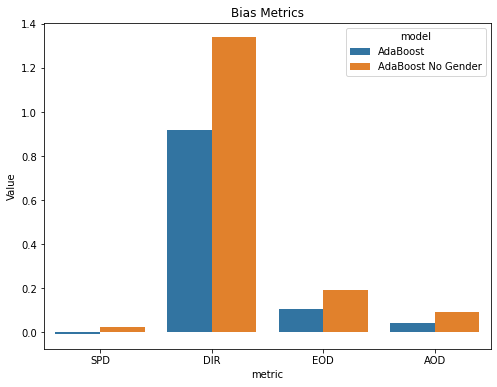

In [98]:
visualize_bias([
    ('AdaBoost', adaboost_pred),
    ('AdaBoost No Gender', no_gender_pred)
], y_train, is_male_train)

The next technique we will try is a preprocessing step called Reweighing. It adjusts the sample weights to try to create a less biased classifier.

**Sample weights** tell a learning algorithm like a decision tree how much weight to give each instance when learning a model. Samples with more weight affect decisions, like which attribute to split on, or which label to give a decision tree, more. This is very similar to how AdaBoost uses weights and weighted error when building its ensemble.

Let's start by testing out the Reweighing preprocessing step. The following code calculated the adjusted weights for `X_train`, and then reports those weights, summarized by Gender and Attrition.

**Instructions**:
* Run the following code and analyze the results in your Reflection section.

Relevant documentation:
* [Reweighing](https://aif360.readthedocs.io/en/stable/modules/generated/aif360.sklearn.preprocessing.Reweighing.html)

In [99]:
from aif360.sklearn.preprocessing import Reweighing

reweighing = Reweighing('Gender')
_, sample_weights = reweighing.fit_transform(X_train, y_train)

X_train_weighted = X_train.copy()
X_train_weighted['Weight'] = sample_weights
X_train_weighted['Attrition'] = y_train
X_train_weighted.reset_index(inplace=True, drop=True)

X_train_weighted.groupby(['Gender', 'Attrition']).Weight.describe()


count      mean           std       min       25%       50%  \
Gender Attrition                                                                
Female 0          347.0  0.989797  2.223652e-16  0.989797  0.989797  0.989797   
       1           63.0  1.056196  2.238281e-16  1.056196  1.056196  1.056196   
Male   0          515.0  1.006874  2.222605e-16  1.006874  1.006874  1.006874   
       1          104.0  0.965958  0.000000e+00  0.965958  0.965958  0.965958   

                       75%       max  
Gender Attrition                      
Female 0          0.989797  0.989797  
       1          1.056196  1.056196  
Male   0          1.006874  1.006874  
       1          0.965958  0.965958

Because `Reweighing` returns sample weights, it does not work well with sklearn `Pipeline`s. Instead, the aif360 library provides a classifier called `ReweighinMeta` that wraps an existing classifier, like AdaBoost, and performs Reweighing right before training. We can then use this meta-classifier in an exisitng pipeline.

**Instructions**:
* Create a `ReweighingMeta` wrapper classifier called `reweighing_meta`.
  * Use the AdaBoost `base_estimator` as the estimator.
  * You do not need to provide a reweigher argument, since by default it will use the only protected attribute in our dataset: Gender.
* Create a `reweighing_pipeline` that first runs the `preprocessing_pipeline` and then the `reweighing_meta` classifier.
  * **Note**: Normally we cannot use `ReweighingMeta` with other sklearn preprocessing steps because they remove information about our protected attribute (Gender). That's why we  made a custom `preprocessing_pipeline` that keeps the data as a DataFrame with an index.

Relevant documentation:
* [ReweighingMeta](https://aif360.readthedocs.io/en/latest/modules/generated/aif360.sklearn.preprocessing.ReweighingMeta.html)

In [101]:
from aif360.sklearn.preprocessing import ReweighingMeta, Reweighing

base_estimator = AdaBoostClassifier(n_estimators=60, learning_rate=0.75, random_state=1234)

# TODO: Create the ReweighingMeta classifier
reweighing_meta = ReweighingMeta(base_estimator)
# Create a pipeline with preprocessing_pipeline, then reweighing_meta
reweighing_pipeline = make_pipeline(preprocessing_pipeline, reweighing_meta)



reweighing_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessingtransformer', PreprocessingTransformer()),
                ('reweighingmeta',
                 ReweighingMeta(estimator=AdaBoostClassifier(learning_rate=0.75,
                                                             n_estimators=60,
                                                             random_state=1234)))])

In [102]:
assert reweighing_meta.estimator == base_estimator, "Make sure you use the base_estimator as your estimator"
assert reweighing_pipeline.steps[0][1] == preprocessing_pipeline, "Preprocessing comes first in the pipeline"
assert reweighing_pipeline.steps[1][1] == reweighing_meta, "Your reweighing_meta comes second in the pipeline"

**Instructions**
* Now calculate the performance and predictions of your `reweighing_pipeline` using `cross_validate_and_predict`.
  * Remember you can look at your earlier code for how to calculate this.
* Print the `classification_report` and `confusion_matrix`.
* Analyze the results in your Reflection section.

In [105]:
# TODO: Calculate performance nad predictions
reweighing_performance , reweighing_pred =  cross_validate_and_predict(
    reweighing_pipeline, X_train, y_train, scoring_metrics
)

print(classification_report(y_train, reweighing_pred))
print(confusion_matrix(y_train, reweighing_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       862
           1       0.71      0.36      0.48       167

    accuracy                           0.87      1029
   macro avg       0.80      0.67      0.70      1029
weighted avg       0.86      0.87      0.85      1029

[[838  24]
 [107  60]]


In [106]:
assert reweighing_performance.shape == (5, 7), "The first return result is the performance"
assert reweighing_pred.shape == y_train.shape, "The second return result is the predictions"

Now, let's plot the comparative performance of the 3 versions of AdaBoost, first in terms of raw performance, and then in terms of bias metrics.

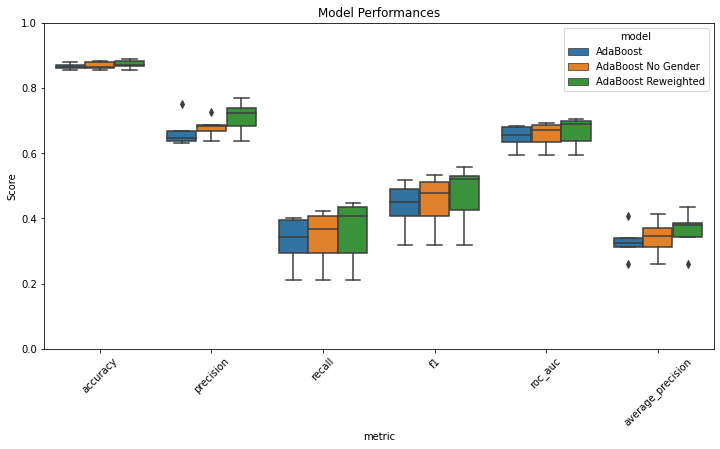

In [107]:
plot_performances([
    ('AdaBoost', adaboost_performance),
    ('AdaBoost No Gender', no_gender_performance),
    ('AdaBoost Reweighted', reweighing_performance)
])

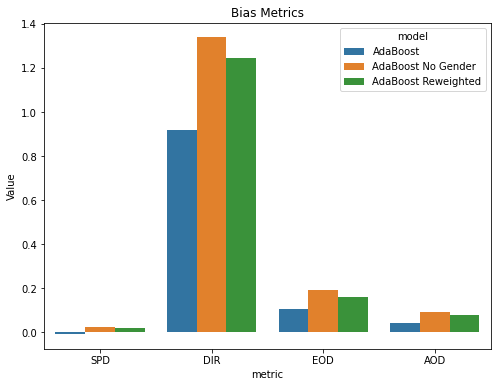

In [108]:
visualize_bias([
    ('AdaBoost', adaboost_pred),
    ('AdaBoost No Gender', no_gender_pred),
    ('AdaBoost Reweighted', reweighing_pred),
], y_train, is_male_train)

The final technique we will explore is a post-processing technique. Similarly to Reweighing, this technique requires a wrapper to work properly in a pipeline.

We will explore the `CalibratedEqualizedOdds` post-processing technique. This technique alters the final predictions of a classifier (specifically *probabilities*) to enforce equal odds (similar TPR and FPR across groups) by randomly replacing some of those predictions with a base rate probability, which is calculated for each combination of class and protected group. The base rates are designed to create equal rates of false positives and false negatives in each group.

**Instructions**:
* Create a `CalibratedEqualizedOdds` post processor `ceo_post`, using a `random_state` of 1234. It can automatically infer the protected attribute (Gender) from the dataset.
* Create a `PostProcessingMeta` using the AdaBoost `base_estimator` we created earlier as the estimator and the `ceo_post` as the post-processor.
* Create a `ceo_pipeline` that first runs the `preprocessing_pipeline` and then the `ceo_meta` classifier.

Relevant documentation:
* [CalibratedEqualizedOdds](https://aif360.readthedocs.io/en/stable/modules/generated/aif360.sklearn.postprocessing.CalibratedEqualizedOdds.html)
* [PostProcessingMeta](https://aif360.readthedocs.io/en/stable/modules/generated/aif360.sklearn.postprocessing.PostProcessingMeta.html#aif360.sklearn.postprocessing.PostProcessingMeta)

In [109]:
from aif360.sklearn.postprocessing import CalibratedEqualizedOdds, PostProcessingMeta

# TODO: Create the CalibratedEqualizedOdds post processor and PostProcessingMeta classifier
ceo_post =  CalibratedEqualizedOdds(random_state=1234)
ceo_meta = PostProcessingMeta(base_estimator, ceo_post)

# Create a pipeline with preprocessing_pipeline, then ceo_meta
ceo_pipeline =  make_pipeline(preprocessing_pipeline, ceo_meta)

ceo_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessingtransformer', PreprocessingTransformer()),
                ('postprocessingmeta',
                 PostProcessingMeta(estimator=AdaBoostClassifier(learning_rate=0.75,
                                                                 n_estimators=60,
                                                                 random_state=1234),
                                    postprocessor=CalibratedEqualizedOdds(random_state=1234)))])

In [110]:
assert ceo_post.random_state == 1234, "Don't forget the random state"
assert ceo_meta.estimator == base_estimator, "Make sure you use the base_estimator as your estimator"
assert ceo_pipeline.steps[0][1] == preprocessing_pipeline, "Preprocessing comes first in the pipeline"
assert ceo_pipeline.steps[1][1] == ceo_meta, "Your ceo_meta comes second in the pipeline"

**Instructions**
* Now calculate the performance and predictions of your `ceo_pipeline` using `cross_validate_and_predict`.
  * Remember you can look at your earlier code for how to calculate this.
* Print the `classification_report` and `confusion_matrix`.
* Analyze the results in your Reflection section.

In [111]:
# TODO: Calculate performance nad predictions
ceo_performance , ceo_pred = cross_validate_and_predict(
    ceo_pipeline, X_train, y_train, scoring_metrics
)

print(classification_report(y_train, ceo_pred))
print(confusion_matrix(y_train, ceo_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       862
           1       0.66      0.34      0.44       167

    accuracy                           0.86      1029
   macro avg       0.77      0.65      0.68      1029
weighted avg       0.85      0.86      0.84      1029

[[833  29]
 [111  56]]


In [112]:
assert ceo_performance.shape == (5, 7), "The first return result is the performance"
assert ceo_pred.shape == y_train.shape, "The second return result is the predictions"

Finally, let's plot the comparative performance of the all 4 versions of AdaBoost, first in terms of raw performance, and then in terms of bias metrics.

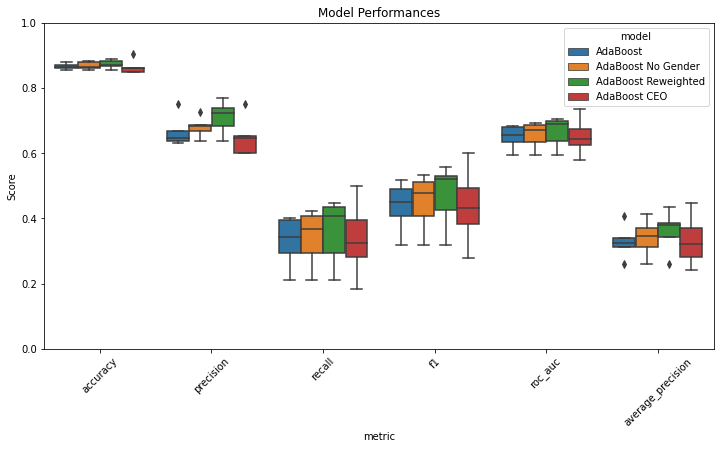

In [113]:
plot_performances([
    ('AdaBoost', adaboost_performance),
    ('AdaBoost No Gender', no_gender_performance),
    ('AdaBoost Reweighted', reweighing_performance),
    ('AdaBoost CEO', ceo_performance)
])

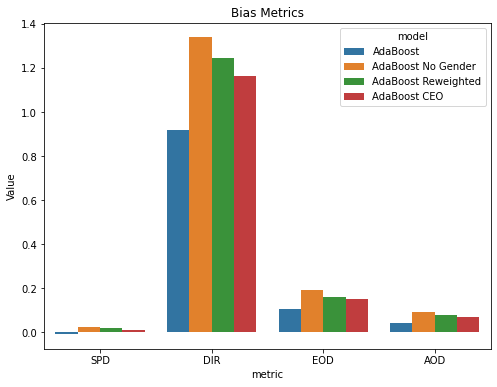

In [114]:
visualize_bias([
    ('AdaBoost', adaboost_pred),
    ('AdaBoost No Gender', no_gender_pred),
    ('AdaBoost Reweighted', reweighing_pred),
    ('AdaBoost CEO', ceo_pred)
], y_train, is_male_train)

In [ ]:
ytrain

In [116]:
# Step 1: Filter y_train for female workers
female_attrition = y_train.loc['Female']

# Step 2: Count the number of female workers with Attrition = 1
female_attrition_true_count = (female_attrition == 1).sum()

# Step 3: Calculate the total number of female workers
total_female_count = len(female_attrition)

# Step 4: Calculate the percentage
percentage_female_attrition = (female_attrition_true_count / total_female_count) * 100

# Step 5: Print the result
print(f"The percentage of female workers with Attrition = True is {percentage_female_attrition:.2f}%")


The percentage of female workers with Attrition = True is 15.37%


**Remember**: Make sure to complete all problems (.ipynb files) in this assignment. When you finish, double-check the submission instructions at the top of this file, and submit on JupyterHub.